<a href="https://colab.research.google.com/github/AyoubHAMD/3D-Reconstruction/blob/master/car_damage_detection_implimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/AyoubHAMD/car-damage-detector.git

Cloning into 'car-damage-detector'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 163 (delta 8), reused 26 (delta 4), pack-reused 131
Receiving objects: 100% (163/163), 83.39 MiB | 27.28 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
!cd car-damage-detector/ ;python setup.py install

In [ ]:
!pip install mrcnn

     |████████████████████████████████| 51 kB 219 kB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54931 sha256=4e0476da9b6459987436e88b5f82eaade5fa6f2615d9a4ba6229fc46e25ae74d
  Stored in directory: /root/.cache/pip/wheels/1d/94/0d/03ff96abc43d2d6c8299a92cbb4eced2a1eda3ca7911c19427
Successfully built mrcnn


In [ ]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y
!pip uninstall h5py -y

!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

Found existing installation: Keras 2.4.3
Uninstalling Keras-2.4.3:
  Successfully uninstalled Keras-2.4.3
Found existing installation: keras-nightly 2.5.0.dev2021032900
Uninstalling keras-nightly-2.5.0.dev2021032900:
  Successfully uninstalled keras-nightly-2.5.0.dev2021032900
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: keras-vis 0.4.1
Uninstalling keras-vis-0.4.1:
  Successfully uninstalled keras-vis-0.4.1
Found existing installation: tensorflow 2.5.0
Uninstalling tensorflow-2.5.0:
  Successfully uninstalled tensorflow-2.5.0
Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Successfully uninstalled h5py-3.1.0
     |████████████████████████████████| 92.6 MB 56 kB/s 
     |████████████████████████████████| 3.2 MB 38.3 MB/s 
     |████████████████████████████████| 42 kB 1.0 MB/s 
     |████████████████████████████████| 367 kB 49.3 MB/s 
   

**Changing the name of car-damage-detector to cardamagedetector**

In [ ]:
import os 
os.rename('/content/car-damage-detector', '/content/cardamagedetector')

In [ ]:

#Import modules
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Import Mask RCNN
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn import model
import mrcnn.model as modellib
from mrcnn.model import log
import cv2
import cardamagedetector.custom as custom
import imgaug,h5py,IPython

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
# Root directory of the project
ROOT_DIR = os.getcwd()
sys.path.append(ROOT_DIR)  # To find local version of the library

# Directory of logs 
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to trained model
custom_WEIGHTS_PATH = os.path.join(ROOT_DIR, "logs/scratch20201228T0014/mask_rcnn_damage_0010.h5")

# Configurations
config = custom.CustomConfig()
dataset_DIR = os.path.join(ROOT_DIR, "") + "cardamagedetector/"
dataset_DIR 

'/content/cardamagedetector/'

In [ ]:
# Load dataset

dataset = custom.CustomDataset()
dataset.load_custom(dataset_DIR, "train")
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 49
Class Count: 2
  0. BG                                                
  1. scratch                                           


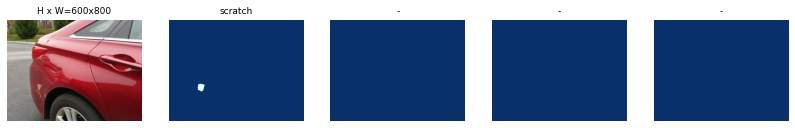

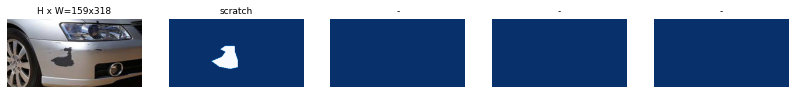

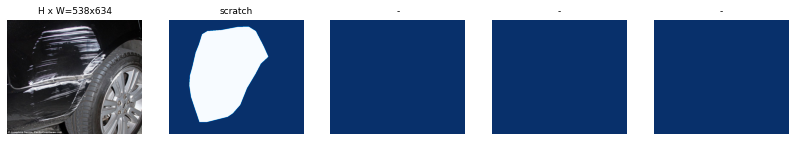

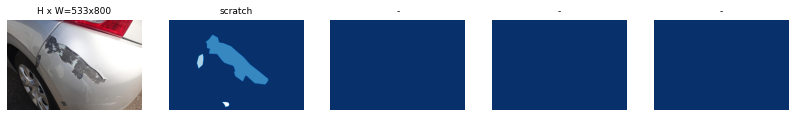

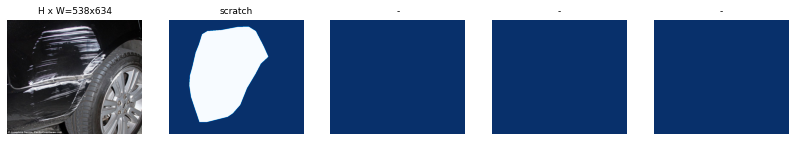

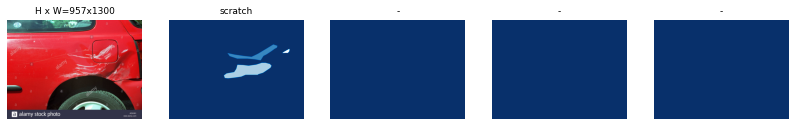

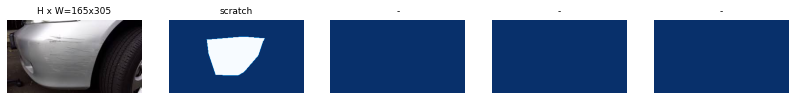

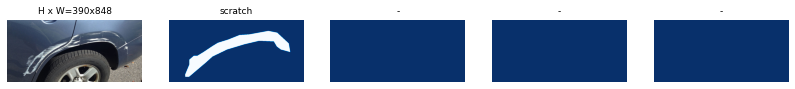

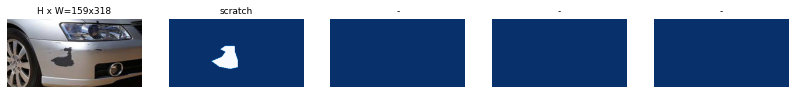

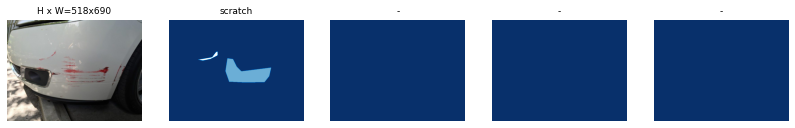

In [ ]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 10)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

### Test with external images 

# BBox 

image_id  38 /content/cardamagedetector/dataset/train/image13.jpg
image                    shape: (2048, 1536, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (2048, 1536, 1)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:  565.00000  max: 1252.00000  int32


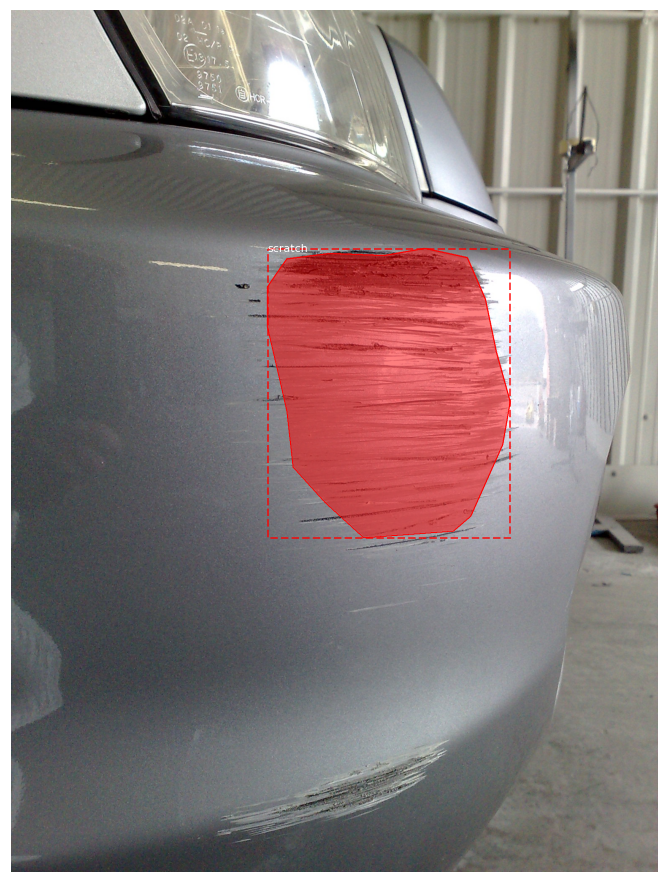

In [ ]:
# Get BB and details of random image
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)

# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)

# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [ ]:
pwd

'/content'

In [ ]:
!python /content/cardamagedetector/custom.py evaluate --dataset="/content/cardamagedetection/Mask_RCNN_damage_detector/" --weights=last

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

# Generate a SavedModel

In [ ]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

# Generate Convert the SavedModel to TFLite

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

# Generate a model for a mobile app